In [1]:
import pandas as pd

### Customers

In [2]:
cust_df = pd.read_csv("datasets/lab 3/Customers.csv", sep=";")
cust_df[cust_df["ContactTitle"] == "Owner"].shape

(17, 5)

In [3]:
cust_df[cust_df["ContactName"].astype(str).str[0] == "A"].shape[0]

10

In [4]:
import re

def find(line):
    if re.search(".*5555.*", line):
        return 1
    else:
        return -1

cust_df[cust_df["Phone"].apply(find) != -1].shape[0]
# ---

2

In [5]:
"5555" in "1555451"

False

In [6]:
cust_df[cust_df["ContactTitle"].isin(["Owner", "Sales Representative"])].shape[0]

34

In [7]:
cust_df["ContactTitle"].groupby(cust_df["ContactTitle"]).count()

ContactTitle
Accounting Manager                10
Assistant Sales Agent              2
Assistant Sales Representative     1
Marketing Assistant                6
Marketing Manager                 12
Order Administrator                2
Owner                             17
Owner/Marketing Assistant          1
Sales Agent                        5
Sales Associate                    7
Sales Manager                     11
Sales Representative              17
Name: ContactTitle, dtype: int64

### Orders

In [8]:
ord_df = pd.read_csv("datasets/lab 3/Orders.csv", sep=";")
ord_df["OrderDate"] = ord_df["OrderDate"].astype("datetime64")
ord_df["RequiredDate"] = ord_df["RequiredDate"].astype("datetime64")
ord_df["ShippedDate"] = ord_df["ShippedDate"].astype("datetime64")
ord_df[ord_df["OrderDate"] > "1997-07-05"].shape[0]
# 488
# ----

488

In [9]:
ord_df[ord_df["Freight"] <= 10.98].shape[0]

184

In [10]:
def spl(line):
    return str.split(line, "-")[0]
ord_df[(ord_df["Freight"] > 500) & (ord_df["OrderDate"].astype(str).apply(spl) == "1997")].shape[0]

5

In [11]:
ord_df[(ord_df["Freight"] > 500) | (ord_df["OrderDate"].astype(str).apply(spl) == "1997")]

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
124,10372,QUEEN,5,1996-12-04,1997-01-01,1996-12-09,890.78
152,10400,EASTC,1,1997-01-01,1997-01-29,1997-01-16,83.93
153,10401,RATTC,1,1997-01-01,1997-01-29,1997-01-10,12.51
154,10402,ERNSH,8,1997-01-02,1997-02-13,1997-01-10,67.88
155,10403,ERNSH,4,1997-01-03,1997-01-31,1997-01-09,73.79
...,...,...,...,...,...,...,...
664,10912,HUNGO,2,1998-02-26,1998-03-26,1998-03-18,580.91
735,10983,SAVEA,2,1998-03-27,1998-04-24,1998-04-06,657.54
769,11017,ERNSH,9,1998-04-13,1998-05-11,1998-04-20,754.26
782,11030,SAVEA,7,1998-04-17,1998-05-15,1998-04-27,830.75


In [12]:
df_1997 = ord_df[ord_df["OrderDate"].astype(str).apply(spl) == "1997"]
df_1997.sort_values(["Freight"], ascending=False)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
292,10540,QUICK,3,1997-05-19,1997-06-16,1997-06-13,1007.64
443,10691,QUICK,2,1997-10-03,1997-11-14,1997-10-22,810.05
266,10514,ERNSH,3,1997-04-22,1997-05-20,1997-05-16,789.95
231,10479,RATTC,3,1997-03-19,1997-04-16,1997-03-21,708.95
364,10612,SAVEA,1,1997-07-28,1997-08-25,1997-08-01,544.08
...,...,...,...,...,...,...,...
451,10699,MORGK,3,1997-10-09,1997-11-06,1997-10-13,0.58
338,10586,REGGC,9,1997-07-02,1997-07-30,1997-07-09,0.48
167,10415,HUNGC,3,1997-01-15,1997-02-12,1997-01-24,0.20
261,10509,BLAUS,4,1997-04-17,1997-05-15,1997-04-29,0.15


In [13]:
sorted = df_1997.sort_values(["CustomerID", "Freight"])
sorted[sorted["CustomerID"] == "ANTON"].head(1)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
429,10677,ANTON,1,1997-09-22,1997-10-20,1997-09-26,4.03


In [14]:
maxF = ord_df["Freight"].max()
minF = ord_df["Freight"].min()
print(f"Max: {maxF}")
print(f"Min: {minF}")
maxF-minF

Max: 1007.64
Min: 0.02


1007.62

In [15]:
feb_1998 = ord_df[(ord_df["OrderDate"] == "1998-02-26")]
feb_1998["Freight"].sum()

776.27

In [16]:
ord_df.shape

(830, 7)

In [17]:
employees_df = pd.read_excel("datasets/lab 3/Employees.xlsx", "Лист1")
grouped = ord_df["EmployeeID"].groupby(ord_df["EmployeeID"]).count()
id = grouped.sort_values().index[0]
employees_df[employees_df.EmployeeID == id]

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone
4,5,Steven,Buchanan,Sales Manager,Mr.,1955-03-04 00:00:00.000,1993-10-17 00:00:00.000,14 Garrett Hill,(71) 555-4848


In [18]:
from datetime import datetime
grouped = ord_df.groupby(["OrderDate"]).count()
date = grouped.OrderID.idxmax()
date.date().strftime("%Y%m%d")

'19980226'

In [19]:
grouped = ord_df.groupby(["EmployeeID", "CustomerID"])
print(grouped["Freight"].count().max())
grouped.OrderID.count().idxmax()

6


(1, 'SAVEA')

### Products

In [20]:
# https://stackabuse.com/how-to-format-dates-in-python/

products_df = pd.read_csv("datasets/lab 3/Products.csv", sep=";")
print(products_df[(products_df.UnitPrice >= 18.00) & (products_df.UnitPrice <= 22.00)].shape)
products_df[(products_df.UnitPrice >= 18.00) & (products_df.UnitPrice <= 22.00)]

(16, 7)


,ProductID,ProductName,Product_Description,UnitPrice,CategoryID,CategoryName,Category_Description
0,1,Chai,10 boxes x 20 bags,18.00,1,Beverages,Soft drinks. coffees. teas. beers. and ales
1,2,Chang,24 - 12 oz bottles,19.00,1,Beverages,Soft drinks. coffees. teas. beers. and ales
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,2,Condiments,Sweet and savory sauces. relishes. spreads. an...
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,2,Condiments,Sweet and savory sauces. relishes. spreads. an...
10,11,Queso Cabrales,1 kg pkg.,21.00,4,Dairy Products,Cheeses
21,22,Gustaf's Knackebrod,24 - 500 g pkgs.,21.00,5,Grains/Cereals,Breads. crackers. pasta. and cereal
34,35,Steeleye Stout,24 - 12 oz bottles,18.00,1,Beverages,Soft drinks. coffees. teas. beers. and ales
35,36,Inlagd Sill,24 - 250 g jars,19.00,8,Seafood,Seaweed and fish
38,39,Chartreuse verte,750 cc per bottle,18.00,1,Beverages,Soft drinks. coffees. teas. beers. and ales
39,40,Boston Crab Meat,24 - 4 oz tins,18.40,8,Seafood,Seaweed and fish


### Orders details

In [21]:
ordet_df = pd.read_csv("datasets/lab 3/Order_details.csv", sep=";")
ordet_df

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
...,...,...,...,...,...
2150,11077,64,33.25,2,0.03
2151,11077,66,17.00,1,0.00
2152,11077,73,15.00,2,0.01
2153,11077,75,7.75,4,0.00


In [22]:
# 3
ordet_df["Profit"] = ordet_df["UnitPrice"]*ordet_df["Quantity"] - ordet_df["UnitPrice"]*ordet_df["Discount"]*ordet_df["Quantity"]
ordet_df

,OrderID,ProductID,UnitPrice,Quantity,Discount,Profit
0,10248,11,14.00,12,0.00,168.000
1,10248,42,9.80,10,0.00,98.000
2,10248,72,34.80,5,0.00,174.000
3,10249,14,18.60,9,0.00,167.400
4,10249,51,42.40,40,0.00,1696.000
...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.505
2151,11077,66,17.00,1,0.00,17.000
2152,11077,73,15.00,2,0.01,29.700
2153,11077,75,7.75,4,0.00,31.000


In [23]:
ord_df = pd.read_csv("datasets/lab 3/Orders.csv", sep=";")
len(ordet_df["OrderID"].unique())

830

In [24]:
ordet_df = pd.read_csv("datasets/lab 3/Order_details.csv", sep=";")
ord_df["OrderDate"] = ord_df["OrderDate"].astype("datetime64")
ord_df["RequiredDate"] = ord_df["RequiredDate"].astype("datetime64")
ord_df["ShippedDate"] = ord_df["ShippedDate"].astype("datetime64")

#grouped_det = ordet_df[["OrderID", "UnitPrice", "Discount", "Quantity"]].groupby(by=["OrderID"]).sum()
#grouped_det[grouped_det.OrderID == 10865]
ordet_df["discount"] = ordet_df["UnitPrice"]*ordet_df["Quantity"]*ordet_df["Discount"]
ordet_df["Profit"] = ordet_df["UnitPrice"]*ordet_df["Quantity"] - ordet_df["discount"]
grouped_det = ordet_df[["OrderID", "UnitPrice", "Discount", "Quantity", "Profit", "discount"]].groupby(by=["OrderID"]).sum()
grouped_det[grouped_det.discount > 2000]
# grouped_det["discount"] = grouped_det["UnitPrice"]*grouped_det["Quantity"] - grouped_det.Profit


#grouped_det[grouped_det.discount > 2000]
#grouped_det[grouped_det.discount > 2000]
#grouped_det
# 4014 без скидки
# 

# 4014 - 1
# x - 0.3

,UnitPrice,Discount,Quantity,Profit,discount
OrderID,,,,,
10353,227.60,0.40,62,8593.28,2148.32
10372,330.60,1.00,164,9210.90,3070.30
10424,235.20,0.60,139,9194.56,2298.64
10912,144.79,0.50,100,6200.55,2066.85
11030,219.14,0.75,330,12615.05,3706.85


In [25]:
grouped_det[grouped_det.Profit.max() == grouped_det.Profit]

,UnitPrice,Discount,Quantity,Profit,discount
OrderID,,,,,
10865,281.5,0.1,140,16387.5,862.5


In [26]:
grouped = ord_df.groupby(by="EmployeeID").count()
employees_df[employees_df.EmployeeID == grouped["OrderID"].idxmax()]

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone
3,4,Margaret,Peacock,Sales Representative,Mrs.,1937-09-19 00:00:00.000,1993-05-03 00:00:00.000,4110 Old Redmond Rd.,(206) 555-8122


In [27]:
orders_orders_details = ord_df.join(grouped_det.Profit, on="OrderID")
orders_orders_details = orders_orders_details.merge(cust_df)
grouped = orders_orders_details.groupby(by=["CustomerID", "ContactName"]).sum()
grouped[grouped.Profit.max() == grouped.Profit]
# --- 
#grouped[grouped.index == "QUICK"]

,,OrderID,EmployeeID,Freight,Profit
CustomerID,ContactName,,,,
QUICK,Horst Kloss,298009,109,5605.63,110277.305


In [28]:
orders_details_products = ordet_df.join(products_df.CategoryID, on="ProductID")
grouped = orders_details_products.groupby(by="CategoryID").sum()
row = grouped[grouped.Profit.max() == grouped.Profit]
row.join(products_df.CategoryName, on="CategoryID")
# ----

,OrderID,ProductID,UnitPrice,Quantity,Discount,discount,Profit,CategoryName
CategoryID,,,,,,,,
8.0,3458216,12689,10617.78,8096,18.05,18327.558,236674.642,Meat/Poultry


In [29]:
ordet_df = pd.read_csv("datasets/lab 3/Order_details.csv", sep=";")
ordet_df

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
...,...,...,...,...,...
2150,11077,64,33.25,2,0.03
2151,11077,66,17.00,1,0.00
2152,11077,73,15.00,2,0.01
2153,11077,75,7.75,4,0.00


In [30]:
#167357

In [31]:
orders_details_products = ordet_df.merge(products_df, left_on="ProductID", right_on="ProductID")
# скидка по чистой выручке
#orders_details_products
orders_details_products["discount"] = orders_details_products["UnitPrice_x"]*orders_details_products["Quantity"]*orders_details_products["Discount"]
orders_details_products["Profit"] = orders_details_products["UnitPrice_x"]*orders_details_products["Quantity"] - orders_details_products["discount"]
orders_details_products.groupby(by="CategoryName").sum()
# #grouped[grouped.CategoryName == "Confections"]

,OrderID,ProductID,UnitPrice_x,Quantity,Discount,UnitPrice_y,CategoryID,discount,Profit
CategoryName,,,,,,,,,
Beverages,4312144,16356,11811.65,9532,25.00,12599.00,404,18658.7700,267868.1800
Condiments,2303505,9557,4605.30,5298,11.37,4887.20,432,7647.6650,106047.0850
Confections,3557446,12147,7549.30,7906,19.02,8073.11,1002,9741.8750,167357.2250
Dairy Products,3894474,17806,9875.80,9149,19.56,10572.90,1464,16823.2150,234507.2850
Grains/Cereals,2090139,9567,4164.30,4562,8.88,4443.00,980,4982.2125,95744.5875
Meat/Poultry,1839680,6951,7417.33,4199,11.15,7933.48,1038,15166.4405,163022.3595
Produce,1450501,4386,4786.45,2990,6.18,5083.30,952,5284.0200,99984.5800
Seafood,3523066,11139,6290.78,7681,19.88,6637.43,2640,10361.3525,131261.7375


In [32]:
orders_details_products = ordet_df[["ProductID","UnitPrice", "Quantity"]].join(products_df.CategoryName, on="ProductID")

only_conf = orders_details_products[orders_details_products.CategoryName == "Confections"]
# only_conf = orders_details_products
only_conf = only_conf.join(ordet_df.Discount)
only_conf
only_conf["discount"] = only_conf.UnitPrice*only_conf.Quantity*only_conf.Discount
only_conf["Profit"] = only_conf.UnitPrice*only_conf.Quantity - only_conf.discount
only_conf
# # скидку потом по productid
grouped = only_conf.groupby("CategoryName").sum()
# #grouped[grouped.CategoryName == "Confections"]
grouped

,ProductID,UnitPrice,Quantity,Discount,discount,Profit
CategoryName,,,,,,
Confections,9785,6360.0,6371,18.01,9867.168,124644.382


In [33]:
cust_and_emplo = pd.concat([cust_df["ContactTitle"], employees_df["Title"]])
cust_and_emplo.groupby(cust_and_emplo).count()

Accounting Manager                10
Assistant Sales Agent              2
Assistant Sales Representative     1
Inside Sales Coordinator           1
Marketing Assistant                6
Marketing Manager                 12
Order Administrator                2
Owner                             17
Owner/Marketing Assistant          1
Sales Agent                        5
Sales Associate                    7
Sales Manager                     12
Sales Representative              23
Vice President, Sales              1
dtype: int64

In [34]:
def yearmonth(date):
    return str.split(date, "-")[0] + "-" + str.split(date, "-")[1]
ord_df["Year-Month"] = ord_df["OrderDate"].astype(str).apply(yearmonth)
ord_df.groupby("Year-Month").count().idxmax()

OrderID         1998-04
CustomerID      1998-04
EmployeeID      1998-04
OrderDate       1998-04
RequiredDate    1998-04
ShippedDate     1998-03
Freight         1998-04
dtype: object

In [35]:
def is_43_week(date):
    # year and month
    if (str.split(date, "-")[0] != "1996") & (str.split(date, "-")[1] != "10"):
        return False
    # day
    if (int(str.split(date, "-")[2]) >= 21) & (int(str.split(date, "-")[2]) <= 27):
        return True
    return False

ord_df[ord_df["OrderDate"].astype(str).apply(is_43_week) == True].shape

# меньше 

(45, 8)

In [38]:
# def month(date):
#     return str.split(date, "-")[1]
orders_orders_details = ord_df.join(ordet_df, lsuffix="_left", rsuffix="_right", how="inner")
orders_orders_details["OrderDate"].astype("datetime64")
orders_orders_details["Month"] = orders_orders_details["OrderDate"].dt.month
orders_orders_details["Year"] = orders_orders_details["OrderDate"].astype("datetime64").dt.isocalendar().year
orders_orders_details["Profit"] = orders_orders_details["UnitPrice"] * orders_orders_details["Quantity"] - orders_orders_details["UnitPrice"]*orders_orders_details["Quantity"]*orders_orders_details["Discount"]
orders_orders_details.groupby(["EmployeeID", "Month"]).sum().max()
# 30990

#orders_orders_details

OrderID_left     229913.00
Freight            2167.99
OrderID_right    220724.00
ProductID           903.00
UnitPrice           743.80
Quantity            516.00
Discount              1.55
Year              41955.00
Profit            15515.46
dtype: float64

In [39]:
def quarter(date):
    month = int(str.split(date, "-")[1])
    if (1 <= month <= 3):
        return 1
    elif (4 <= month <= 6):
        return 2
    elif (7 <= month <= 9):
        return 3
    else:
        return 4
    #if (month >= 1) & (month <=4):
def year(date):
    return str.split(date, "-")[0]
ord_df["Year"] = ord_df["OrderDate"].astype(str).apply(year)
ord_df["Q"] = ord_df["OrderDate"].astype(str).apply(quarter)
pd.pivot_table(ord_df, index="Year", columns="Q", values="OrderID", aggfunc="count")

Q,1,2,3,4
Year,,,,
1996,NaN,NaN,70.0,82.0
1997,92.0,93.0,103.0,120.0
1998,182.0,88.0,NaN,NaN


In [40]:
ordet_df["Profit"] = ordet_df["UnitPrice"] * ordet_df["Quantity"] - ordet_df["UnitPrice"]*ordet_df["Quantity"]*ordet_df["Discount"]
ordet_df.groupby(pd.cut(ordet_df["Profit"], 5)).count()

,OrderID,ProductID,UnitPrice,Quantity,Discount,Profit
Profit,,,,,,
"(-11.005, 3165.84]",2118,2118,2118,2118,2118,2118
"(3165.84, 6326.88]",26,26,26,26,26,26
"(6326.88, 9487.92]",6,6,6,6,6,6
"(9487.92, 12648.96]",3,3,3,3,3,3
"(12648.96, 15810.0]",2,2,2,2,2,2


In [41]:
ordet_df.groupby(pd.qcut(ordet_df["Profit"], 5)).count()

,OrderID,ProductID,UnitPrice,Quantity,Discount,Profit
Profit,,,,,,
"(4.7989999999999995, 114.0]",434,434,434,434,434,434
"(114.0, 250.0]",435,435,435,435,435,435
"(250.0, 432.0]",429,429,429,429,429,429
"(432.0, 792.6]",426,426,426,426,426,426
"(792.6, 15810.0]",431,431,431,431,431,431


[]

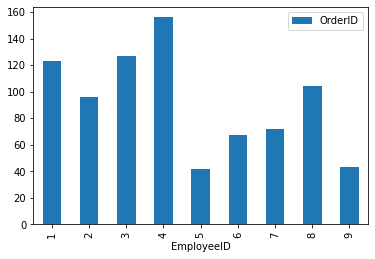

In [42]:
grouped = ord_df.groupby("EmployeeID").count()

bar = grouped.plot.bar(y="OrderID")
bar.plot()

[]

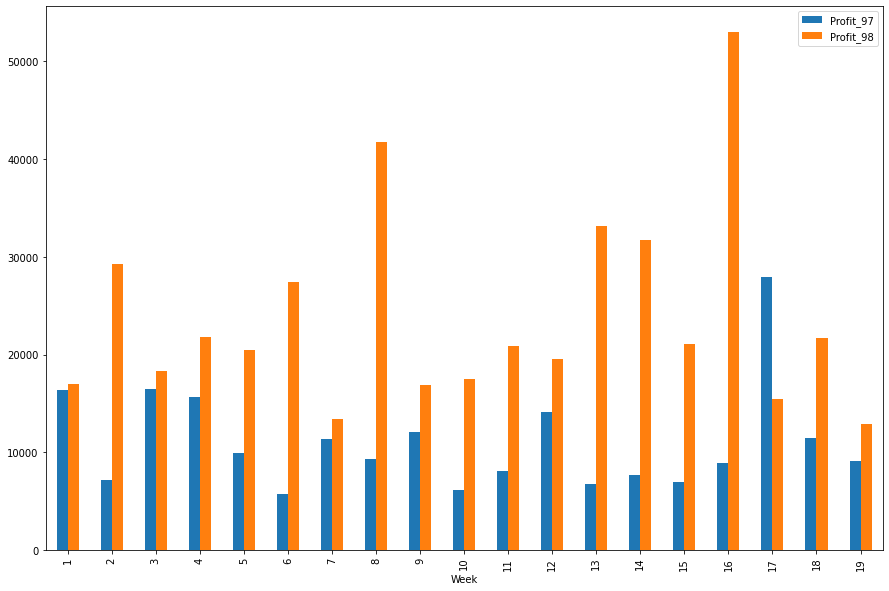

In [202]:
orders_orders_details["Week"] = orders_orders_details["OrderDate"].astype("datetime64").dt.isocalendar().week
profit_97 = orders_orders_details[orders_orders_details["Year"] == 1997].groupby("Week").sum()
profit_98 = orders_orders_details[orders_orders_details["Year"] == 1998].groupby("Week").sum()
profits = profit_97.join(profit_98, lsuffix="_97", rsuffix="_98", how="inner")[["Profit_97", "Profit_98"]]
bar = profits.plot.bar(figsize=(15, 10))
bar.plot()